## Diabetes Prediction Model

### Importing libraries

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

%matplotlib inline

In [280]:
data = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Diabetes-Prediction/master/data/pima-data.csv")

In [281]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [282]:
data.shape

(768, 10)

In [283]:
## checking the diabetes output variable
data["diabetes"].unique()

array([ True, False])

In [284]:
# check if any null value is present
data.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

No missing values are there but we have seen Insulin feature has (0) values which make no sense. So we will check the count of 0 values in each feature.

## Changing the diabetes column data from boolean to number

In [253]:
diabetes_map = {True: 1, False: 0}

In [254]:
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [255]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [256]:
data["diabetes"].unique()

array([1, 0], dtype=int64)

### Checking the count of each class observation in diabetes (output) variable

In [257]:
data[data["diabetes"]==1].shape[0]

## count of diabetic patients

268

In [258]:
data[data["diabetes"]==0].shape[0]

## count of non-diabetic patients

500

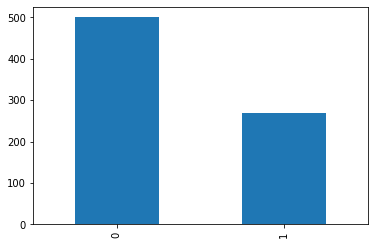

In [259]:
data["diabetes"].value_counts().plot(kind="bar")

We can see that the ratio of non-diabetic to diabetic patients is 2:1

### Correlation 

In [260]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


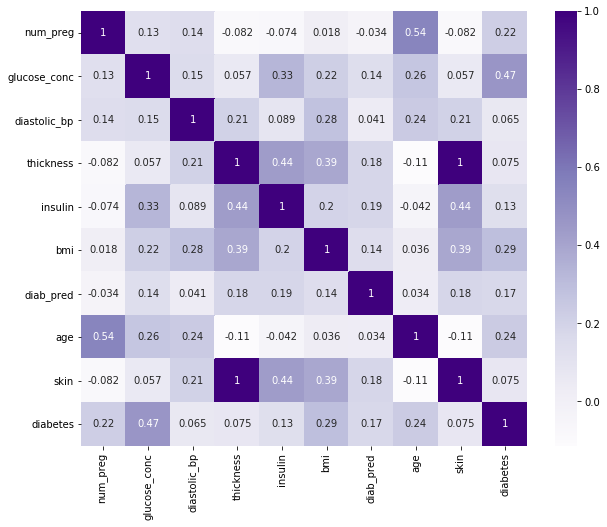

In [261]:
plt.figure(figsize=(10,8))
sn.heatmap(data=data.corr(),annot=True,cmap="Purples")

Only Skin and thickness columns are strongly correlated. So we will have to remove one of them.

In [262]:
## dropping skin column

data=data.drop(axis="columns",columns="skin")
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [263]:
data.shape

## One column skin has been removed as it is strongly correlated with one independent variable

(768, 9)

### Train Test Split

In [264]:
X=data.iloc[:,:8]
Y=data["diabetes"]

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=15)

## Check how many other missing(zero) values

In [265]:
print("total number of rows : {}".format(len(data)))
print("number of rows missing num_preg: {}".format(len(data.loc[data['num_preg'] == 0])))
print("number of rows missing glucose_conc: {}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing thickness: {}".format(len(data.loc[data['thickness'] == 0])))
print("number of rows missing insulin: {}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {}".format(len(data.loc[data['age'] == 0])))

total number of rows : 768
number of rows missing num_preg: 111
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing thickness: 227
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0


### Replacing the 0 values in each feature by median values of respective features

In [266]:
for col in data.columns:
    if col!="diabetes" and col!="diab_pred" and col!="age":
        data[col]=np.where(data[col]==0,data[col].median(),data[col])

In [267]:
for column in data.columns:
    if column!="diabetes":
        print(column,"has",":-> {} zeros".format(data[data[column]==0].shape[0]))

num_preg has :-> 0 zeros
glucose_conc has :-> 0 zeros
diastolic_bp has :-> 0 zeros
thickness has :-> 0 zeros
insulin has :-> 0 zeros
bmi has :-> 0 zeros
diab_pred has :-> 0 zeros
age has :-> 0 zeros


Now all the (0) values in the independent columns have been replaced by respective column medians.

## MODEL BUILDING

### 1. LOGISTIC REGRESSION

In [268]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Ram Baldotra\anaconda3\conda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [269]:
print("Accuracy on test set:",lr.score(x_test,y_test))

Accuracy on test set: 0.7489177489177489


In [270]:
pred_lr=lr.predict(x_test)
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

[[132  28]
 [ 30  41]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       160
           1       0.59      0.58      0.59        71

    accuracy                           0.75       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.75      0.75      0.75       231



### 2. DECISION TREE

In [271]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [272]:
print("Accuracy on test set:",dt.score(x_test,y_test))

Accuracy on test set: 0.696969696969697


In [273]:
pred_dt=dt.predict(x_test)
print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

[[118  42]
 [ 28  43]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       160
           1       0.51      0.61      0.55        71

    accuracy                           0.70       231
   macro avg       0.66      0.67      0.66       231
weighted avg       0.72      0.70      0.70       231



### 3. RANDOM FOREST

In [274]:
rf=RandomForestClassifier(n_estimators=300)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300)

In [275]:
print("Accuracy on test set:",rf.score(x_test,y_test))

Accuracy on test set: 0.7532467532467533


In [276]:
pred_rf=rf.predict(x_test)
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

[[131  29]
 [ 28  43]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       160
           1       0.60      0.61      0.60        71

    accuracy                           0.75       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.75      0.75      0.75       231



### Result :

Random Forest has given the higest accuracy: 0.75 and recall : 0.61 that implies that this algorithm predicts the most true positive values i.e.( predicts most Diabetic patients from our data set )

SO AT THE END ,

### RESULT is RANDOM FOREST GIVES THE HIGHEST ACCURACY AND HIGHEST RECALL